In [1]:
#Our goal is to use predict if an individual survived or not in the titanic ship wreck
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path="/content/titanic_clean.csv"

In [0]:
df=pd.read_csv(path)

In [5]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived', 'Initial'],
      dtype='object')

In [6]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.066409,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,13.244532,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [7]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Initial
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr


In [8]:
df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
Survived       False
Initial        False
dtype: bool

In [0]:
variables = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived', 'Initial']
corr_mat=df[variables].corr().round(2)

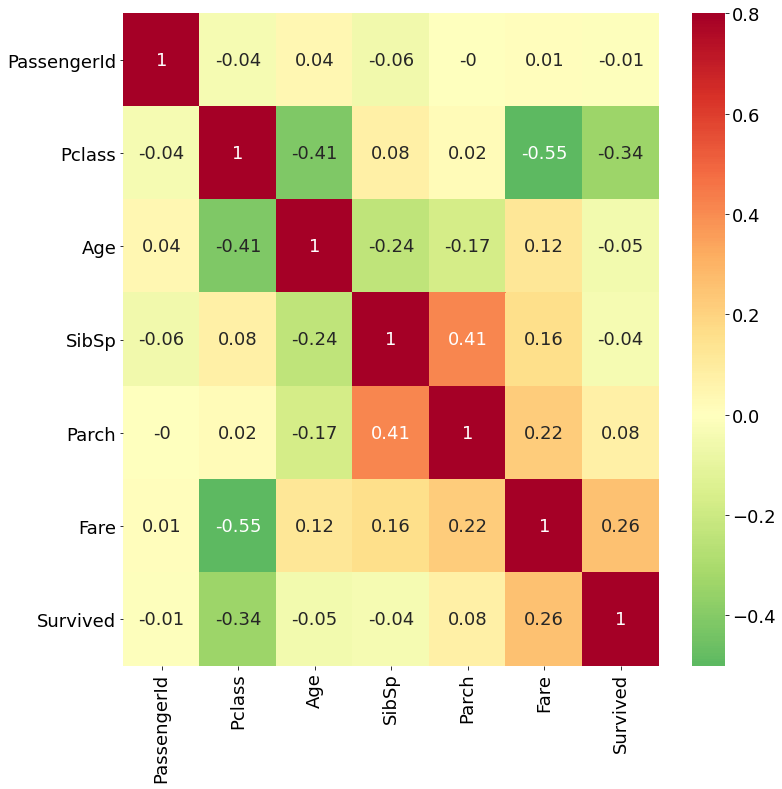

In [12]:
plt.rcParams['font.size']=18
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat,vmin=-0.5,vmax=0.8,cmap=plt.cm.RdYlGn_r,center=0,annot=True)

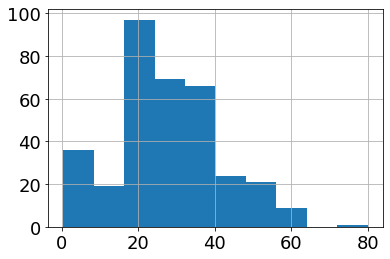

In [14]:
df[df['Survived']==1].Age.hist()

In [15]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [16]:
df.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

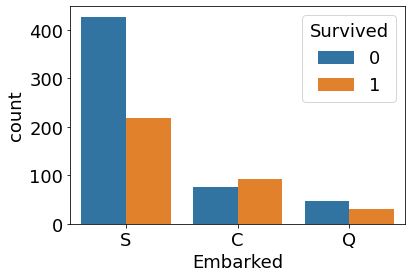

In [17]:
sns.countplot('Embarked',hue='Survived',data=df)

In [18]:
df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

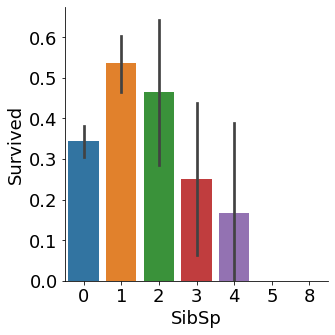

In [19]:
sns.catplot(x="SibSp", y="Survived", data=df,  kind="bar")

In [20]:
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [0]:
sex = pd.get_dummies(df['Sex'], drop_first = True)

In [0]:
embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [0]:

df.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [24]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Initial
0,1,3,22.0,1,0,7.2500,0,Mr
1,2,1,38.0,1,0,71.2833,1,Mrs
2,3,3,26.0,0,0,7.9250,1,Miss
3,4,1,35.0,1,0,53.1000,1,Mrs
4,5,3,35.0,0,0,8.0500,0,Mr


In [0]:
df = pd.concat([df, sex, embarked], axis = 1)

In [27]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Initial,male,Q,S,male,Q,S
0,1,3,22.0,1,0,7.2500,0,Mr,1,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,1,Mrs,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,1,Miss,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,Mrs,0,0,1,0,0,1
4,5,3,35.0,0,0,8.0500,0,Mr,1,0,1,1,0,1


In [0]:
df = df.drop('male', 1)
df = df.drop('Q', 1)
df=df.drop('S',1)

In [29]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Initial
0,1,3,22.0,1,0,7.2500,0,Mr
1,2,1,38.0,1,0,71.2833,1,Mrs
2,3,3,26.0,0,0,7.9250,1,Miss
3,4,1,35.0,1,0,53.1000,1,Mrs
4,5,3,35.0,0,0,8.0500,0,Mr


In [0]:
df = pd.concat([df, sex, embarked], axis = 1)

In [31]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Initial,male,Q,S
0,1,3,22.0,1,0,7.2500,0,Mr,1,0,1
1,2,1,38.0,1,0,71.2833,1,Mrs,0,0,0
2,3,3,26.0,0,0,7.9250,1,Miss,0,0,1
3,4,1,35.0,1,0,53.1000,1,Mrs,0,0,1
4,5,3,35.0,0,0,8.0500,0,Mr,1,0,1


In [0]:
training_data_set = df.drop(['PassengerId', 'Initial','Survived'], axis=1)

In [35]:
training_data_set.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [0]:
X_train, X_test, y_train, y_test = train_test_split(traning_data_set,df.Survived,test_size=0.20,random_state=42)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [0]:
model=LogisticRegression()

In [39]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions=model.predict(X_test)

In [43]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [0]:
df_compare = X_test.reset_index(drop=True)

In [45]:
df_compare.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,24.0,1,1,15.2458,1,0,0
1,2,31.0,0,0,10.5000,1,0,1
2,3,20.0,0,0,7.9250,1,0,1
3,2,6.0,0,1,33.0000,0,0,1
4,3,14.0,1,0,11.2417,0,0,0


In [0]:
df_compare['Survived'] = y_test.values

In [0]:
df_compare['Predicted'] = predictions

In [48]:
df_compare.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived,Predicted
0,3,24.0,1,1,15.2458,1,0,0,1,0
1,2,31.0,0,0,10.5000,1,0,1,0,0
2,3,20.0,0,0,7.9250,1,0,1,0,0
3,2,6.0,0,1,33.0000,0,0,1,1,1
4,3,14.0,1,0,11.2417,0,0,0,1,1


In [49]:
df_compare.loc[df_compare.Survived==df_compare.Predicted].shape

(145, 10)

In [50]:
df_compare.loc[df_compare.Survived==df_compare.Predicted].shape[0]/df_compare.shape[0]

0.8100558659217877

In [51]:
model.score(X_test,y_test)

0.8100558659217877

In [52]:
confusion_matrix(y_test, predictions)

array([[91, 14],
       [20, 54]])